<a href="https://colab.research.google.com/github/jKaushalb/MNIST_GAN/blob/main/Mnist_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=0c8fe024f044a239dceac2cd514ed0640504aa2c491c55cc71723d58e9d07707
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
 import getpass

from pyngrok import ngrok, conf

print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()

# Open a TCP ngrok tunnel to the SSH server
connection_string = ngrok.connect(22, "tcp").public_url

ssh_url, port = connection_string.strip("tcp://").split(":")
print(f" * ngrok tunnel available, access with `ssh root@{ssh_url} -p{port}`")

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth
··········
 * ngrok tunnel available, access with `ssh root@8.tcp.ngrok.io -p16464`


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

#mnist GAN


In [ ]:
# from torch.nn.modules.conv import ConvTranspose2d
# " old Generator and discriminator"
# ### Generator
# """
# one funny thing happend while coding this,  you should not use reserved keyword for variables , as i have use int and allocated the tensor now while i was casting  lattent_size it throws tensor object is not callable.
# so now int reffers to current variable which holds the tensor so not use reserved keywords :) :)
# """
# class Gen(nn.Module):

#   def __init__(self,lattent_dim = 4 * 5 *5 , lattent_channel = 4 ):
#     super().__init__()
#     self.lattent_dim = lattent_dim
#     self.lattent_channel = lattent_channel
#     self.lattent_size = int((self.lattent_dim / self.lattent_channel) ** 0.5)
#     print(self.lattent_size)
#     self.kernel_size = 3
#     self.dim = 3.5
#     self.stride = 2

#     self.model = nn.Sequential(
#         nn.Unflatten(1,(self.lattent_channel,self.lattent_size ,self.lattent_size)),
#         nn.ConvTranspose2d(self.lattent_channel,4 * self.lattent_channel ,int(self.kernel_size) , stride = 1,bias = False), #make this layer to 7*7 rest layers are coveres upsamples this layer to 28*28
#         nn.BatchNorm2d(4 * self.lattent_channel),
#         nn.Conv2d(4 * self.lattent_channel , 4 * self.lattent_channel, self.kernel_size , padding = "same",bias = False),
#         nn.LeakyReLU(),
#         nn.BatchNorm2d(4 * self.lattent_channel),
#         nn.LeakyReLU(),
#         nn.ConvTranspose2d(4 * self.lattent_channel,3 * self.lattent_channel,self.kernel_size - 1,self.stride,bias = False),
#         nn.BatchNorm2d(3 * self.lattent_channel),
#         nn.LeakyReLU(),
#         nn.Conv2d(3 * self.lattent_channel , 2 * self.lattent_channel, self.kernel_size , padding = "same",bias = False),
#         nn.LeakyReLU(),
#         nn.BatchNorm2d(2 * self.lattent_channel),
#         nn.ConvTranspose2d(2 * self.lattent_channel, self.lattent_channel,self.kernel_size - 1,self.stride,bias = False),
#         nn.BatchNorm2d( self.lattent_channel),
#         nn.LeakyReLU(),
#         nn.Conv2d(self.lattent_channel , 3, self.kernel_size , padding = "same",bias = False),
#         nn.BatchNorm2d( 3 ),
#         nn.LeakyReLU(),
#         nn.Conv2d(3 , 1, self.kernel_size , padding = "same",bias = False),
#         nn.Tanh()#nn.ReLU()#nn.Sigmoid()
#     )


#   def forward(self,input):
#     return self.model(input)


# class Discriminator(nn.Module):

#   def __init__(self):
#     super().__init__()

#     self.model = nn.Sequential(
#         nn.Conv2d(1,5,3,padding = "same" , bias = False),
#         nn.BatchNorm2d(5),
#         nn.LeakyReLU(),
#         nn.MaxPool2d((2,2),stride = 2 ),
#         nn.Conv2d(5,5,3,padding = "same" ,bias = False),
#         nn.BatchNorm2d(5),
#         nn.LeakyReLU(),
#         nn.MaxPool2d((2,2),stride = 2),
#         nn.Conv2d(5,3,3,padding = "same", bias = False),
#         nn.BatchNorm2d(3),
#         nn.LeakyReLU(),
#         nn.MaxPool2d((2,2),stride = 2),
#         nn.Conv2d(3,1,3,stride = 2,padding = "valid" , bias = False),
#         # nn.BatchNorm2d(1),
#         nn.Sigmoid(),


#         )

#   def forward(self,input):
#       return self.model(input)


# device = torch.device( "cuda:0" if torch.cuda.is_available() else "cpu")
# G = Gen()
# G.apply(weights_init)
# G = G.to(device)
# # x = G(input)
# D = Discriminator()
# D.apply(weights_init)
# D = D.to(device)
# D
# # y = D(torch.ones((32,1,28,28)))
# # x.shape,y.shape

# print(D)
# print("@"*10)
# G








5
Discriminator(
  (model): Sequential(
    (0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
    (1): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
    (5): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(5, 3, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
    (9): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(3, 1, kernel_size=(3, 3), stride=(2, 2), 

Gen(
  (model): Sequential(
    (0): Unflatten(dim=1, unflattened_size=(4, 5, 5))
    (1): ConvTranspose2d(4, 16, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): ConvTranspose2d(16, 12, kernel_size=(2, 2), stride=(2, 2), bias=False)
    (8): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.01)
    (10): Conv2d(12, 8, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
    (11): LeakyReLU(negative_slope=0.01)
    (12): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ConvTranspose2d(8, 4, kernel_size=(2, 2), stride=(2, 2), bias=

In [ ]:
# BATCH = 96
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#     transforms.Normalize((0.5),(0.5))
#     ])
# WORKERS =2

# trainset = torchvision.datasets.MNIST(root = "./data" ,train = True , download = True , transform = transform)
# trainsetloader = torch.utils.data.DataLoader(trainset , batch_size = BATCH , num_workers = WORKERS,shuffle = True)
# testset = torchvision.datasets.MNIST(root = "./data" ,train = False , download = True , transform = transform)
# testsetloader = torch.utils.data.DataLoader(testset ,batch_size = BATCH , num_workers = WORKERS ,shuffle = True)

In [ ]:
DATA_PATH = './data'
BATCH_SIZE = 96
IMAGE_CHANNEL = 1
Z_DIM = 100
G_HIDDEN = 64
X_DIM = 64
D_HIDDEN = 64
lr = 2e-4
seed = 1
dataset = torchvision.datasets.MNIST(root=DATA_PATH, download=True,
                     transform=transforms.Compose([
                     transforms.Resize(X_DIM),
                     transforms.ToTensor(),
                     transforms.Normalize((0.5,), (0.5,))
                     ]))

# Dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE,
                                         shuffle=True, num_workers=2)

In [ ]:
from torch.nn.modules.activation import LeakyReLU
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # input layer
            nn.ConvTranspose2d(Z_DIM, G_HIDDEN * 4, 4, 1, 0, bias=False),
            nn.BatchNorm2d(G_HIDDEN * 4),
            nn.LeakyReLU(),
            # 1st hidden layer
            nn.ConvTranspose2d(G_HIDDEN * 4, G_HIDDEN * 3, 4, 2, 1, bias=False),
            nn.BatchNorm2d(G_HIDDEN * 3),
            nn.LeakyReLU(),
            # 2nd hidden layer
            nn.ConvTranspose2d(G_HIDDEN * 3, G_HIDDEN * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(G_HIDDEN * 2),
            nn.LeakyReLU(),
            nn.Conv2d(2*G_HIDDEN,G_HIDDEN,4,1,padding = "same" ,bias=False),
            nn.BatchNorm2d(G_HIDDEN),
            nn.LeakyReLU(),
            # 3rd hidden layer
            nn.ConvTranspose2d(G_HIDDEN , G_HIDDEN, 4, 2, 1, bias=False),
            nn.BatchNorm2d(G_HIDDEN),
            nn.LeakyReLU(),
            nn.Conv2d(G_HIDDEN,G_HIDDEN,4,1,padding = "same" ,bias=False),
            nn.BatchNorm2d(G_HIDDEN),
            nn.LeakyReLU(),
            # output layer
            nn.ConvTranspose2d(G_HIDDEN, IMAGE_CHANNEL, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)



class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # 1st layer
            nn.Conv2d(IMAGE_CHANNEL, D_HIDDEN, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # 2nd layer
            nn.Conv2d(D_HIDDEN, D_HIDDEN * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(D_HIDDEN * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # 3rd layer
            nn.Conv2d(D_HIDDEN * 2, D_HIDDEN * 3, 4, 2, 1, bias=False),
            nn.BatchNorm2d(D_HIDDEN * 3),
            nn.LeakyReLU(0.2, inplace=True),
            # 4th layer
            nn.Conv2d(D_HIDDEN * 3, D_HIDDEN * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(D_HIDDEN * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # output layer
            nn.Conv2d(D_HIDDEN * 4, 3, 4, 1, bias=False,padding = "same"),
            nn.BatchNorm2d(3),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(3,1,4,1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [ ]:
device = torch.device( "cuda:0" if torch.cuda.is_available() else "cpu")
G = Generator()
G.apply(weights_init)
G = G.to(device)
D = Discriminator()
D.apply(weights_init)
D = D.to(device)
print(D)
print("@"*10)
G

Discriminator(
  (main): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 192, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(192, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(256, 3, kernel_size=(4, 4), stride=(1, 1), padding=same, bias=False)
    (12): BatchNorm2d(3, eps=1e-05, moment

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 256, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): ConvTranspose2d(256, 192, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): ConvTranspose2d(192, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.01)
    (9): Conv2d(128, 64, kernel_size=(4, 4), stride=(1, 1), padding=same, bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): LeakyReLU(negative_slope=0.01)
    (12): ConvTranspose2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1

In [ ]:
objective  = nn.BCELoss()
#lr = 0.0001
goptim = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
doptim = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))

****************************************************************************************************
Epoch  0


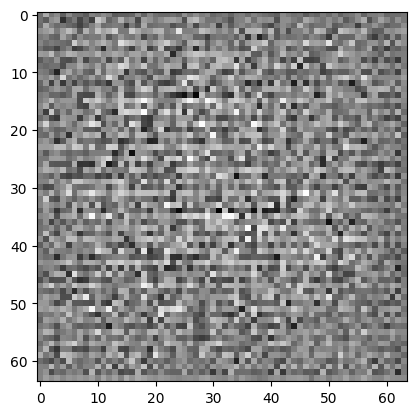

 G loss , D loss, 0.7582550048828125 1.3966500759124756
****************************************************************************************************
Epoch  1


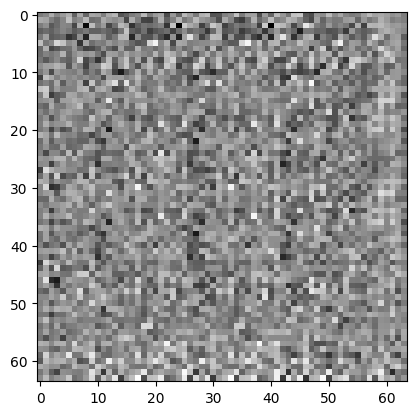

 G loss , D loss, 3.1706464290618896 0.11461761593818665
****************************************************************************************************
Epoch  2


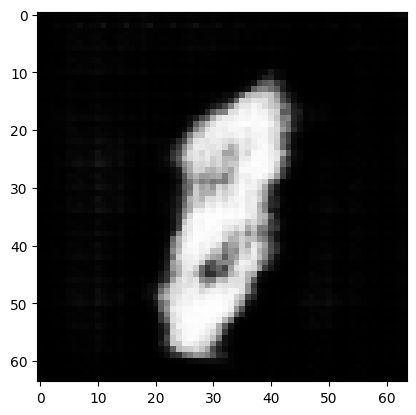

 G loss , D loss, 1.0430700778961182 1.155802607536316
****************************************************************************************************
Epoch  3


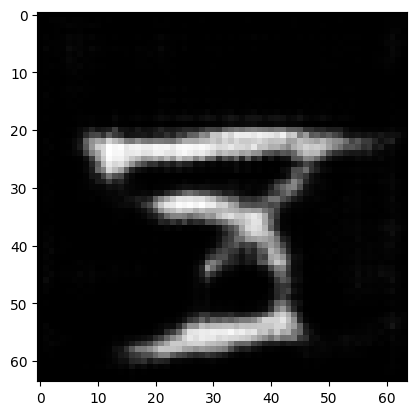

 G loss , D loss, 0.8214218020439148 1.151134967803955
****************************************************************************************************
Epoch  4


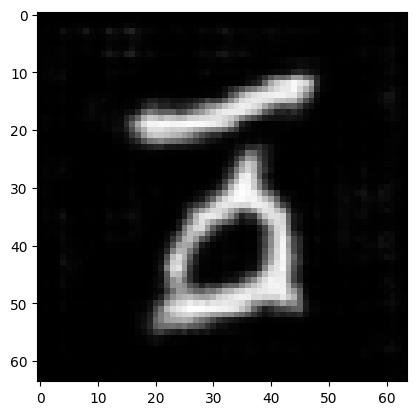

 G loss , D loss, 1.6585534811019897 0.9446748495101929
****************************************************************************************************
Epoch  5


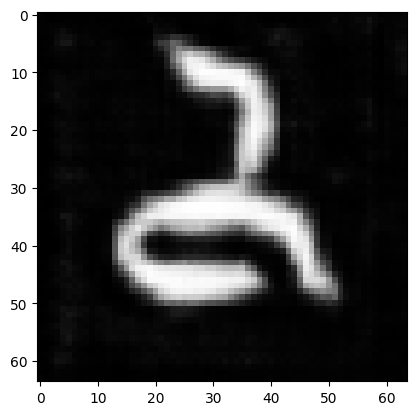

 G loss , D loss, 2.463874340057373 1.2204159498214722
****************************************************************************************************
Epoch  6


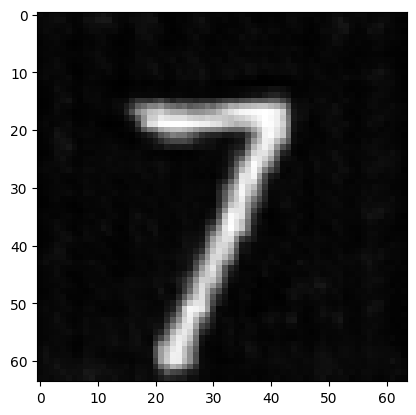

 G loss , D loss, 1.805200457572937 0.8420097231864929
****************************************************************************************************
Epoch  7


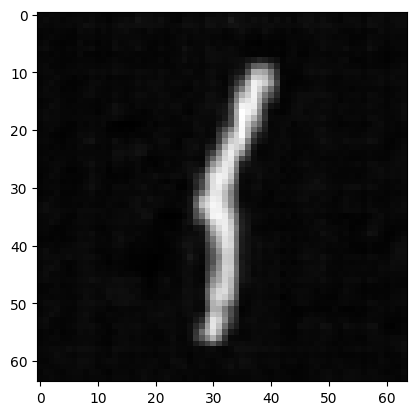

 G loss , D loss, 1.4817440509796143 0.89754718542099
****************************************************************************************************
Epoch  8


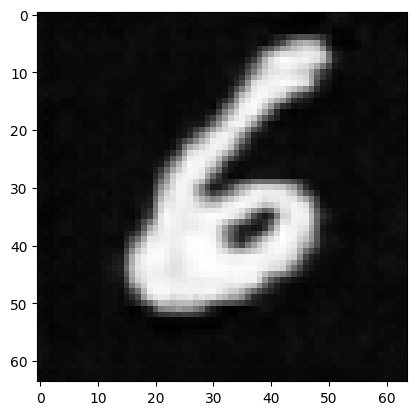

 G loss , D loss, 0.9614051580429077 0.928375244140625
****************************************************************************************************
Epoch  9


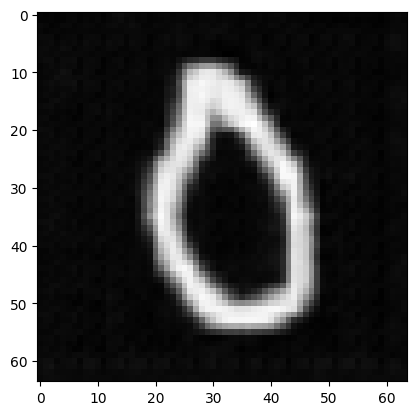

 G loss , D loss, 3.0096023082733154 0.8294975757598877


In [ ]:
# training loop


def training(dataiterator , e = 10 ,fake_shape = (1,1)):
  epochs = e
  img_list = []
  G_losses = []
  D_losses = []
  iters = 0

  for i in range(epochs):
    print("*" * 100)
    print("Epoch ",i)

    for j,data in enumerate(dataiterator,0):
      images_true,label = data
      images_true = images_true.to(device)
      #fake = torch.randn((BATCH,4*5*5),device = device)
      fake = torch.randn(fake_shape , device = device)
      label_true = torch.ones(BATCH,device = device) - 0.005 #label smoothing
      label_false = torch.zeros(BATCH,device = device) + 0.005

      ##### training discriminator ##########
      D.zero_grad()
      G.zero_grad()
      images_fake = G(fake)
      #output = D(torch.cat((images_true,images_fake.detach()),dim=0))
      output_real = D(images_true)
      real_loss = objective(output_real.view(BATCH) , label_true)
      output_fake = D(images_fake.detach())
      output_fake = output_fake
      fake_loss = objective(output_fake.view(BATCH) , label_false)
      #output = output.view(2*BATCH)
      loss_d = real_loss + fake_loss  #objective(output[:BATCH],label_true) + objective(output[BATCH:],label_false)
      loss_d.backward()
      doptim.step()
      D_losses.append(loss_d.item())

      #### training generator #######
      # G.zero_grad()
      gout = D(images_fake)
      gout = gout.view(BATCH)
      # loss_g = objective(gout , label_true)
      loss_g =  objective(gout,label_true)
      loss_g.backward()
      goptim.step()
      G_losses.append(loss_g.item())

      if j % 1000 == 0 :
        # print("real")
        # print(output_real)
        # print("fake")
        # print(output_fake)
        # print("gout")
        # print(gout)
        sample_img = images_fake.detach().cpu().numpy()
        # print(sample_img[12])
        plt.imshow(sample_img[random.randint(0,BATCH-1)][0],cmap = "gray")
        plt.show()
        print(" G loss , D loss,",loss_g.item(),loss_d.item())
        img_list.append(sample_img)



BATCH = BATCH_SIZE

training(dataloader,10,(BATCH,Z_DIM,1,1))










****************************************************************************************************
Epoch  0


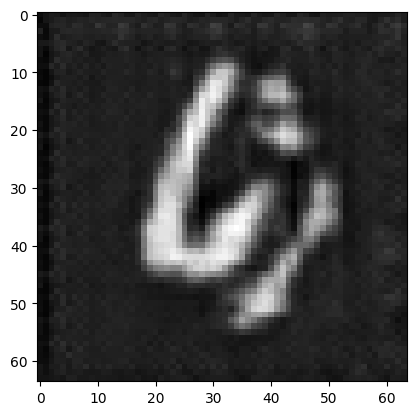

 G loss , D loss, 2.425530433654785 2.680938720703125
****************************************************************************************************
Epoch  1


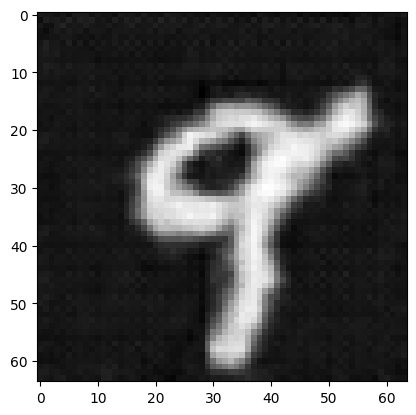

 G loss , D loss, 3.934877395629883 0.10524559766054153
****************************************************************************************************
Epoch  2


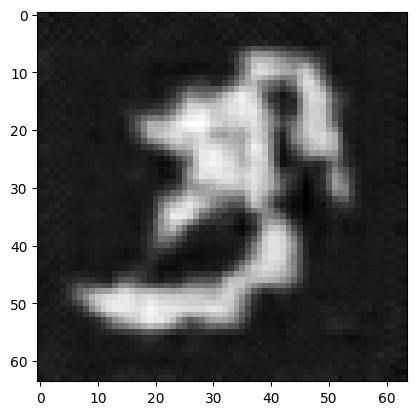

 G loss , D loss, 4.265267372131348 0.0811939537525177
****************************************************************************************************
Epoch  3


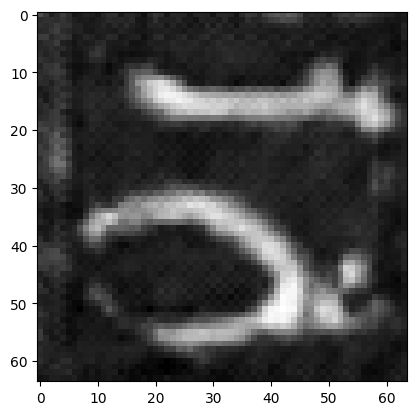

 G loss , D loss, 3.771982192993164 0.09296702593564987
****************************************************************************************************
Epoch  4


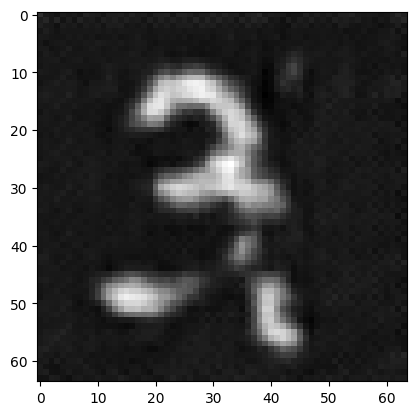

 G loss , D loss, 3.9974639415740967 0.08338512480258942
****************************************************************************************************
Epoch  5


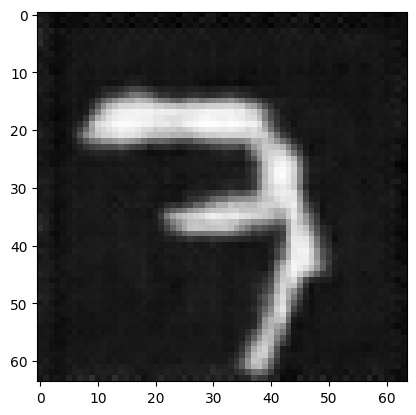

 G loss , D loss, 3.0323405265808105 1.0489064455032349
****************************************************************************************************
Epoch  6


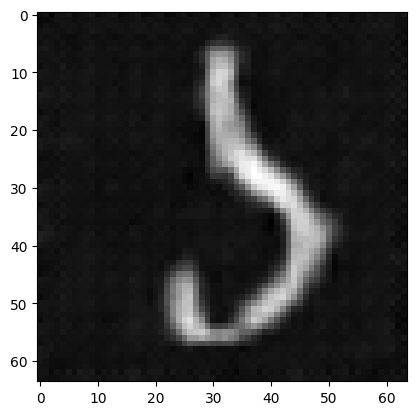

 G loss , D loss, 3.527352809906006 0.11951246857643127
****************************************************************************************************
Epoch  7


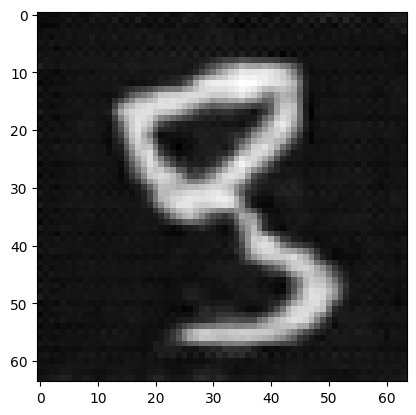

 G loss , D loss, 4.262306213378906 0.07739555835723877
****************************************************************************************************
Epoch  8


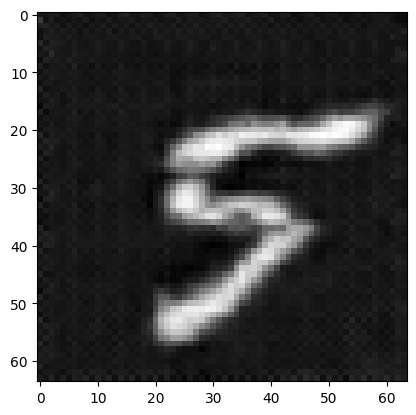

 G loss , D loss, 4.055011749267578 0.11858001351356506
****************************************************************************************************
Epoch  9


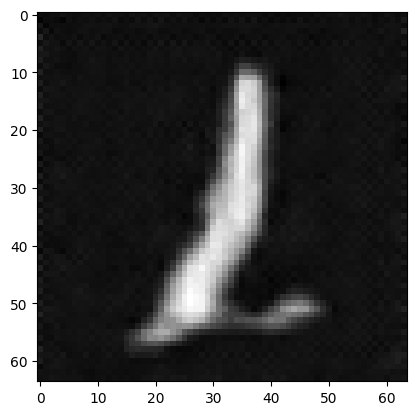

 G loss , D loss, 4.044249057769775 0.10625608265399933
****************************************************************************************************
Epoch  10


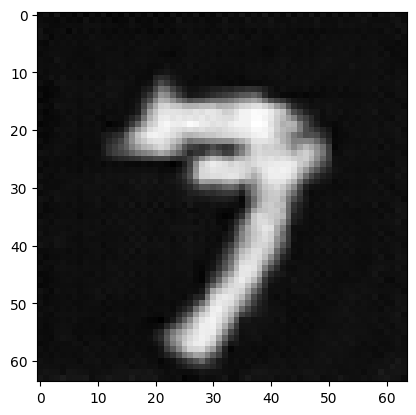

 G loss , D loss, 4.510249137878418 0.10338085889816284
****************************************************************************************************
Epoch  11


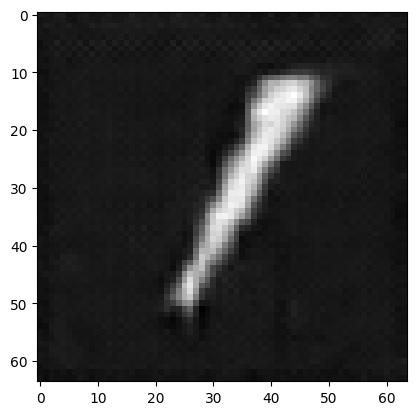

 G loss , D loss, 4.628066062927246 0.07460208237171173
****************************************************************************************************
Epoch  12


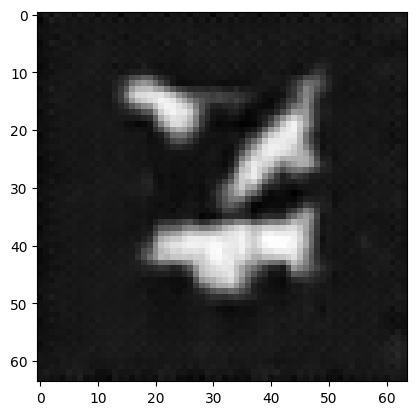

 G loss , D loss, 4.137937068939209 0.10868456959724426
****************************************************************************************************
Epoch  13


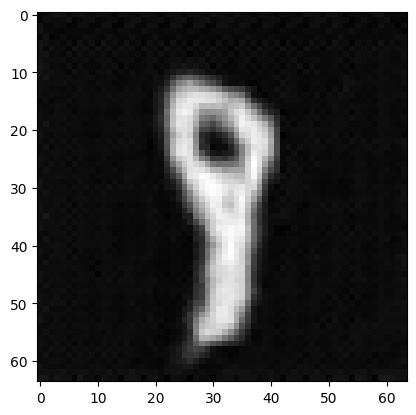

 G loss , D loss, 4.141817092895508 0.10076610743999481
****************************************************************************************************
Epoch  14


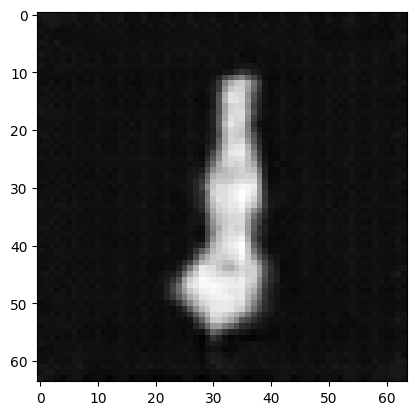

 G loss , D loss, 4.261114120483398 0.12428779155015945
****************************************************************************************************
Epoch  15


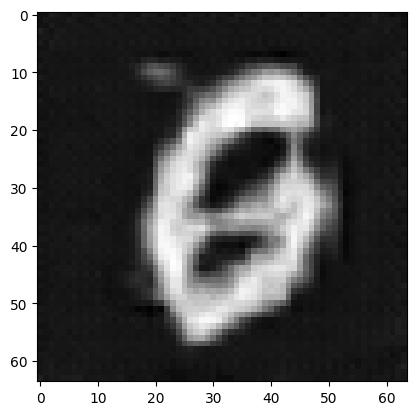

 G loss , D loss, 4.183873653411865 0.0836155042052269
****************************************************************************************************
Epoch  16


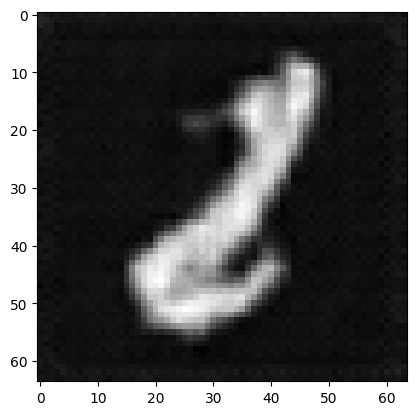

 G loss , D loss, 1.854264259338379 0.4066528081893921
****************************************************************************************************
Epoch  17


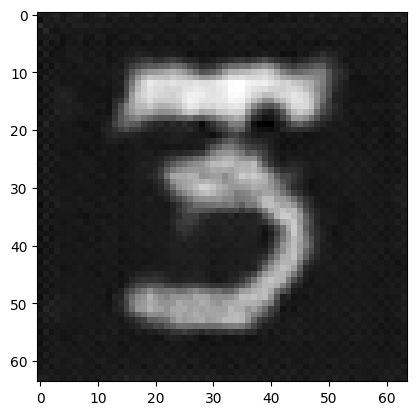

 G loss , D loss, 2.6812500953674316 0.19856610894203186
****************************************************************************************************
Epoch  18


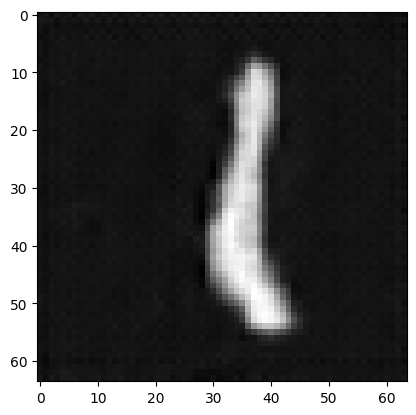

 G loss , D loss, 5.048234462738037 0.11959842592477798
****************************************************************************************************
Epoch  19


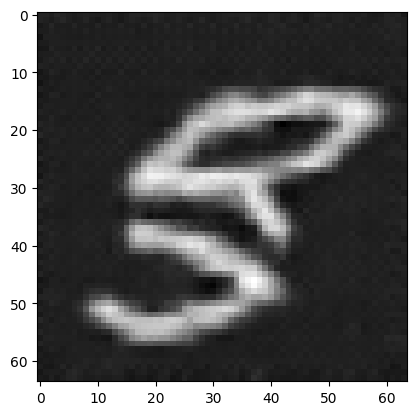

 G loss , D loss, 4.612551689147949 0.0905449315905571


In [ ]:
training(dataloader,20,(BATCH,Z_DIM,1,1))

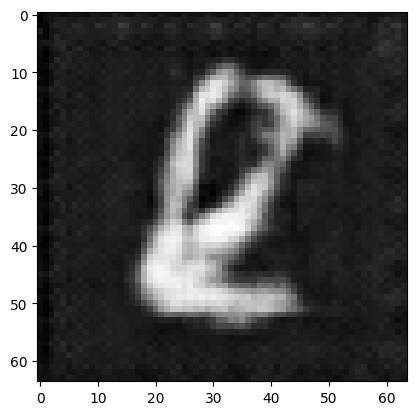

In [ ]:
# generating random sampels

fake = torch.randn((1,100,1,1),device = device)
img = G(fake)

img = img.detach().cpu().numpy()
plt.imshow(img[0][0], cmap = "gray")

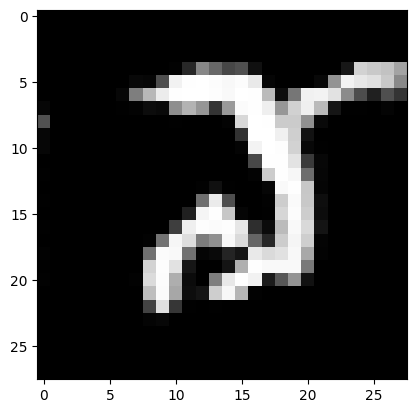

In [ ]:
# generating random sampels

fake = torch.randn((1,4*5*5),device = device) *9
img = G(fake)

img = img.detach().cpu().numpy()
plt.imshow(img[0][0], cmap = "gray")

In [ ]:
torch.save(G.state_dict() , "/content/drive/MyDrive/Deep_NN_Project /GAN/model/DC_GAN_genrator_1.pth")
torch.save(D.state_dict() , "/content/drive/MyDrive/Deep_NN_Project /GAN/model/DC_GAN_discriminator_1.pth")

In [ ]:
for x in G.parameters():
  print(x.grad.mean(),"*"*10,x.grad.max(),"@"*10,x.data.mean(),x.data.shape ,end="\n")

AttributeError: ignored

In [ ]:
for x in D.parameters():
  #print(x, x.grad)
  #if isinstance(x , nn.Sigmoid):
  print(x.grad.mean(),"*"*10,x.grad.max(),"@"*10,x.data.mean(),end="\n")

tensor(2.0978e-10, device='cuda:0') ********** tensor(2.0048e-08, device='cuda:0') @@@@@@@@@@ tensor(-0.0075, device='cuda:0')
tensor(1.2876e-10, device='cuda:0') ********** tensor(7.1123e-10, device='cuda:0') @@@@@@@@@@ tensor(1.0010, device='cuda:0')
tensor(-3.3632e-10, device='cuda:0') ********** tensor(2.0280e-10, device='cuda:0') @@@@@@@@@@ tensor(0.2241, device='cuda:0')
tensor(8.0698e-11, device='cuda:0') ********** tensor(9.2918e-09, device='cuda:0') @@@@@@@@@@ tensor(-0.0114, device='cuda:0')
tensor(-6.1286e-11, device='cuda:0') ********** tensor(9.1430e-10, device='cuda:0') @@@@@@@@@@ tensor(0.9825, device='cuda:0')
tensor(2.0110e-10, device='cuda:0') ********** tensor(1.6270e-09, device='cuda:0') @@@@@@@@@@ tensor(0.0422, device='cuda:0')
tensor(1.0818e-10, device='cuda:0') ********** tensor(2.4548e-08, device='cuda:0') @@@@@@@@@@ tensor(-0.0086, device='cuda:0')
tensor(1.3198e-09, device='cuda:0') ********** tensor(5.5828e-09, device='cuda:0') @@@@@@@@@@ tensor(0.4481, devi

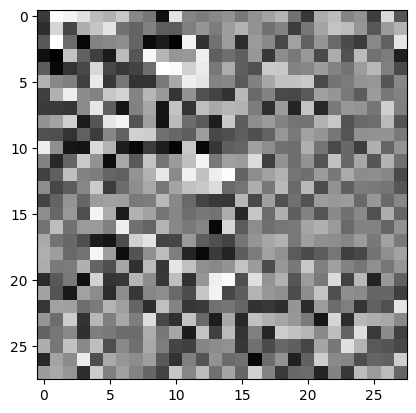

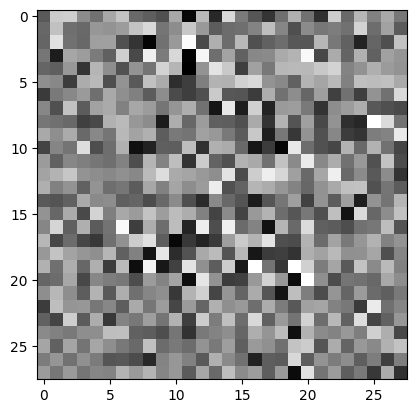

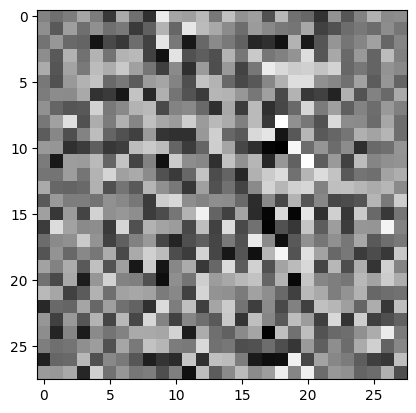

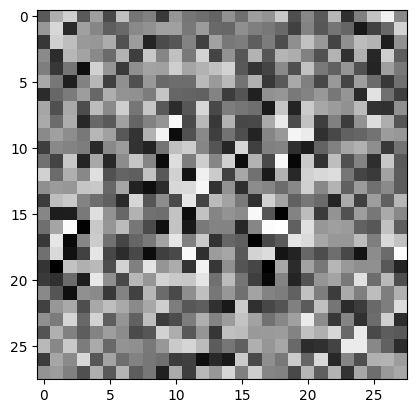

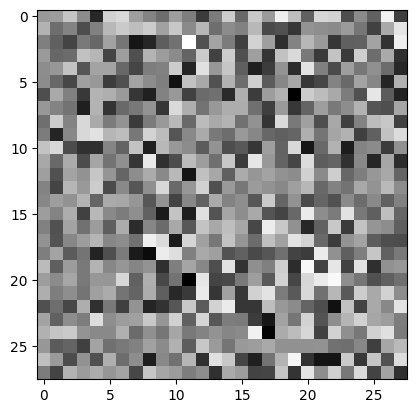

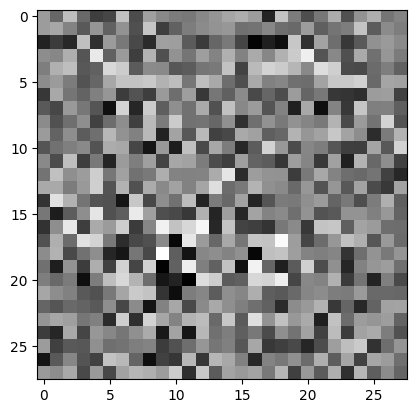

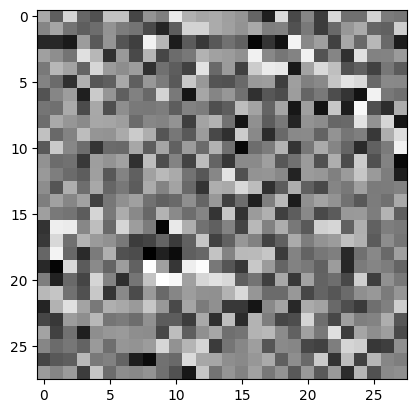

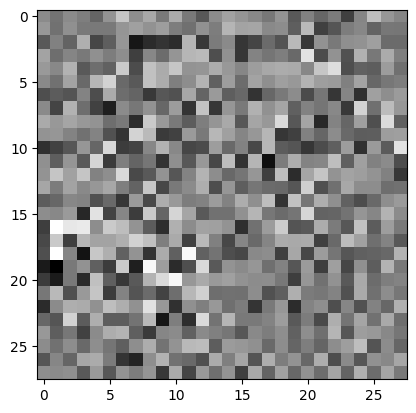

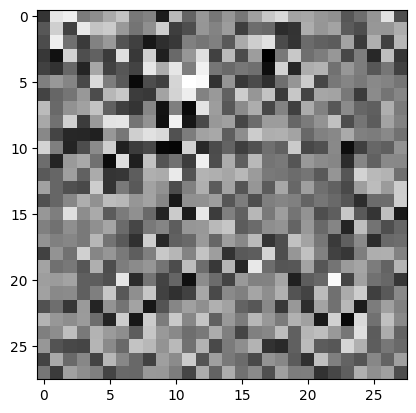

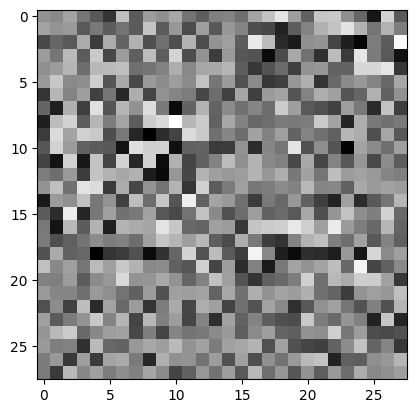

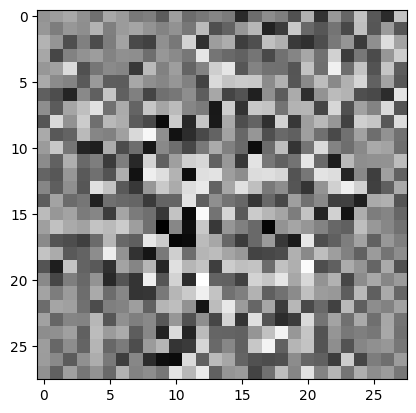

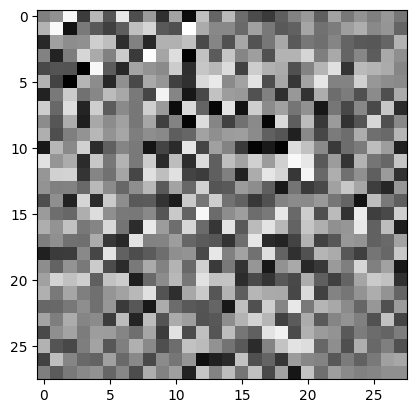

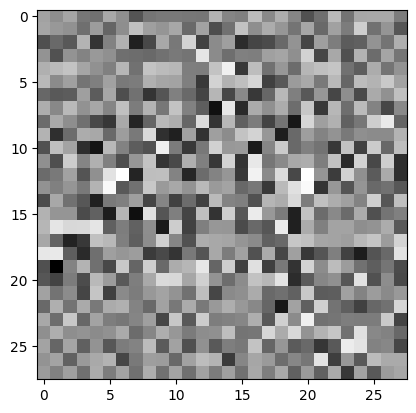

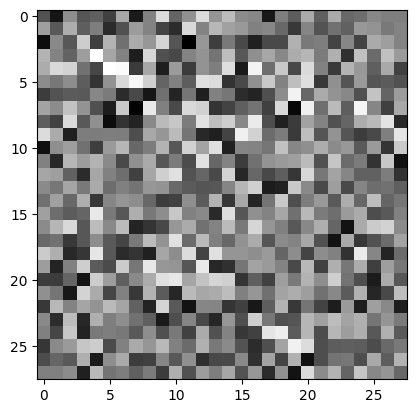

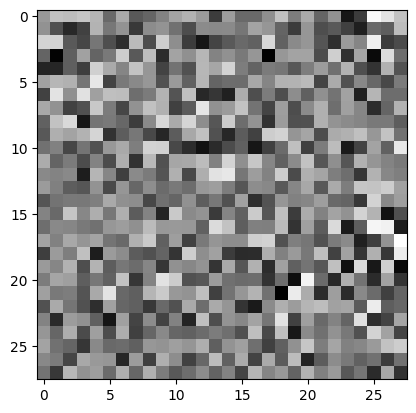

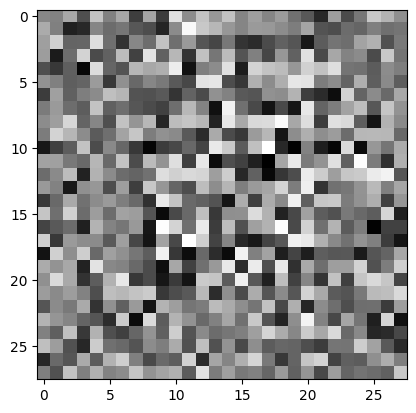

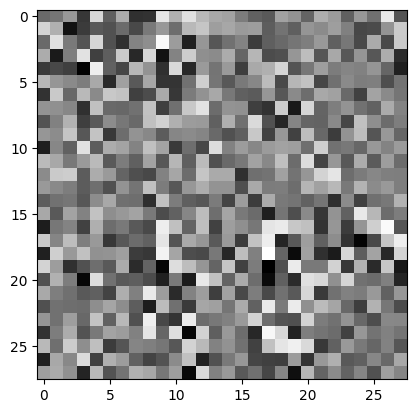

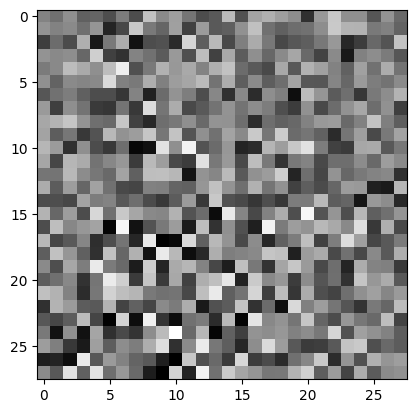

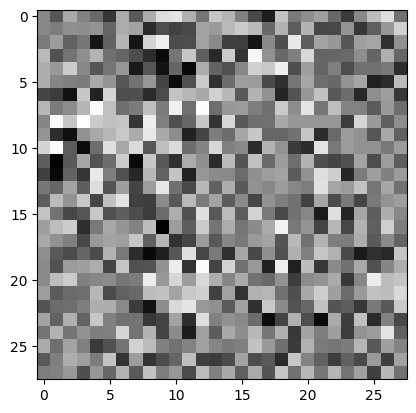

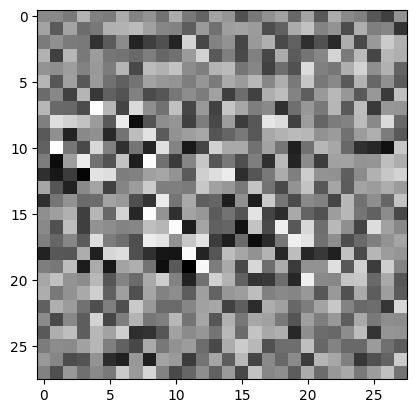

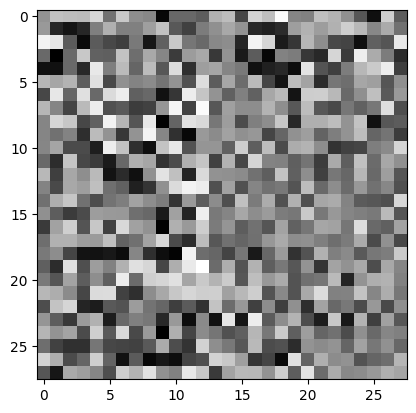

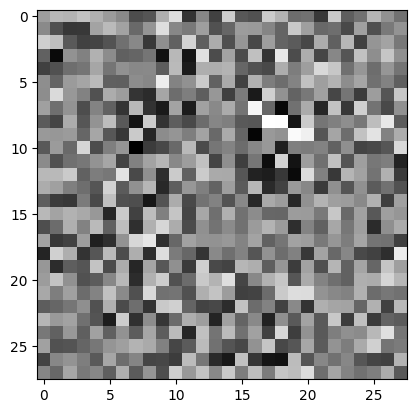

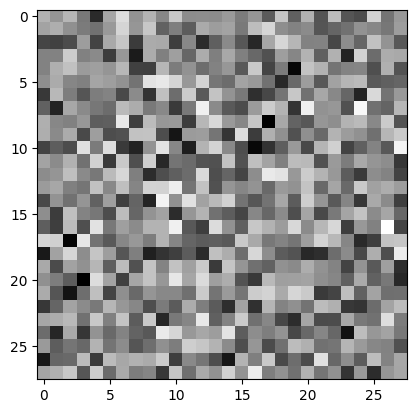

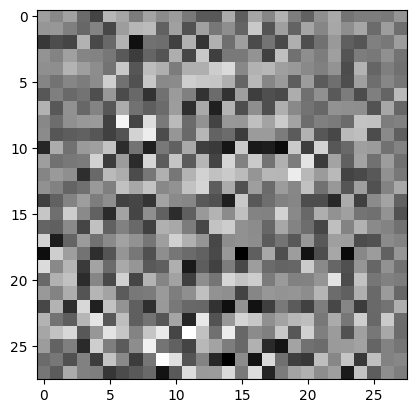

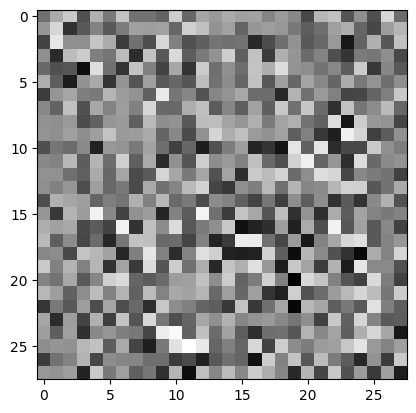

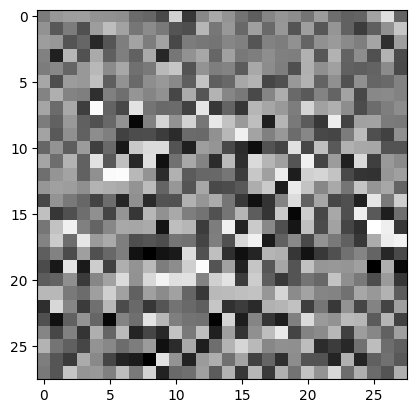

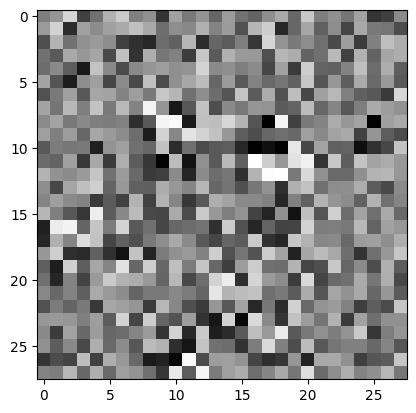

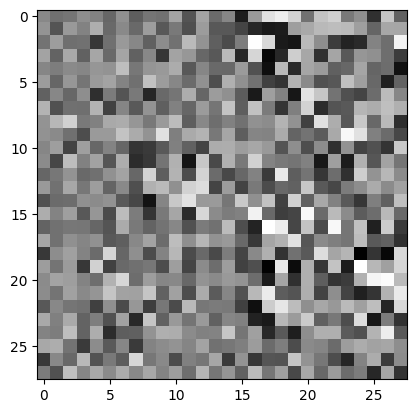

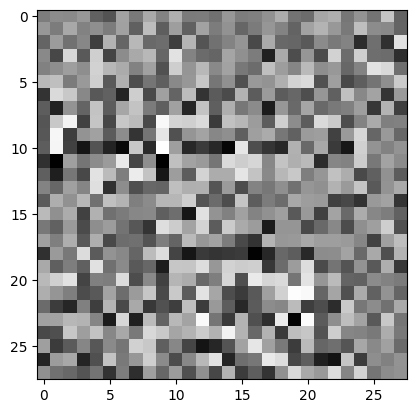

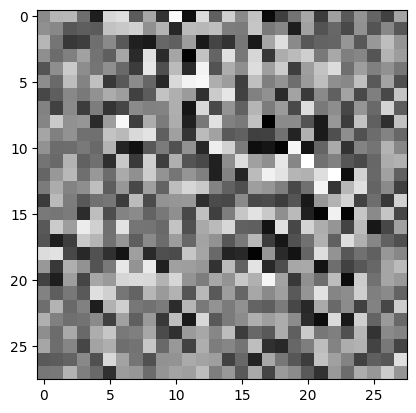

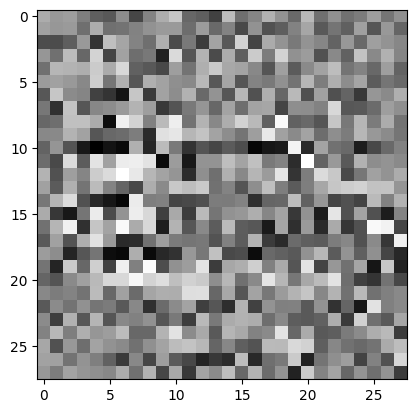

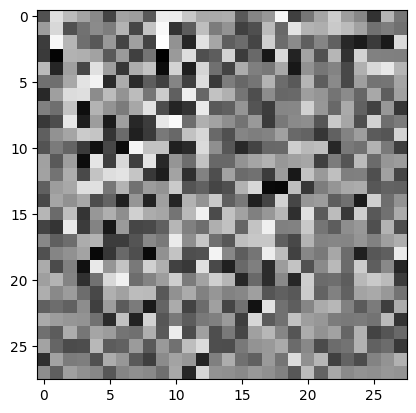

In [ ]:
# device
# images_true.to(device)
# images_true.device
for x in sample_img :
      plt.imshow(x[0],cmap = "gray")
      plt.show()



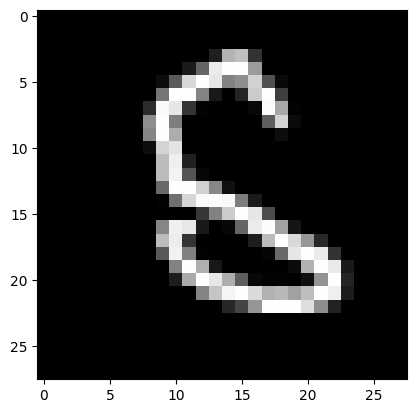

In [ ]:
x = images_fake.detach().numpy()
y = images_true.detach().numpy()
plt.imshow(x[0][0],cmap="gray")
plt.imshow(y[0][0],cmap="gray")
plt.show()

In [ ]:
nn.Unflatten(1,(5,3,3))(torch.ones((32,5*3*3)))

In [ ]:
x = torch.ones((2,4,5,5))
layer = nn.ConvTranspose2d(4,1,3,stride = 1,padding = 0)
out = layer(x)
x.shape,out.shape

(torch.Size([2, 4, 5, 5]), torch.Size([2, 1, 7, 7]))

In [ ]:
layer.weight.shape

torch.Size([2, 1, 3, 3])

## reffered this post while building

https://medium.com/@simple.schwarz/how-to-build-a-gan-for-generating-mnist-digits-in-pytorch-b9bf71269da8

#warm up <-> MNIST classifier

In [ ]:
BATCH = 64
transform = transforms.Compose(
    [transforms.ToTensor(),
    #transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ])
WORKERS =2

trainset = torchvision.datasets.MNIST(root = "./data" ,train = True , download = True , transform = transform)
trainsetloader = torch.utils.data.DataLoader(trainset , batch_size = BATCH , num_workers = WORKERS)
testset = torchvision.datasets.MNIST(root = "./data" ,train = False , download = True , transform = transform)
testsetloader = torch.utils.data.DataLoader(testset ,batch_size = BATCH , num_workers = WORKERS)
classes = list(range(10))

images = iter(trainsetloader)
image,label = next(images)
image.shape,label

(torch.Size([64, 1, 28, 28]),
 tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
         1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
         9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0]))

In [ ]:
# Define Classifier

class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.c1 = nn.Conv2d(1,3,3,padding = "same")
    self.b1 = nn.BatchNorm2d(3)
    self.m1 = nn.MaxPool2d((2,2))
    self.c2 = nn.Conv2d(3,16,3,padding = "same")
    self.b2 = nn.BatchNorm2d(16)
    self.m2 = nn.MaxPool2d((2,2))
    # self.c3 = nn.Conv2d(16,32,3,padding = "same")
    # self.m3 = nn.MaxPool2d((2,2))
    self.l1 = nn.Linear(16*7*7,150)
    self.b3 = nn.BatchNorm1d(150)
    self.l2 = nn.Linear(150,84)
    self.b4 = nn.BatchNorm1d(84)
    self.l3 = nn.Linear(84,10)

  def forward(self,x):
    temp = self.m1(F.relu(self.b1(self.c1(x))))
    # print("1",temp.shape)
    temp = self.m2(F.relu(self.b2(self.c2(temp))))
    # print("2",temp.shape)
    #temp = self.m3(F.relu(self.c3(temp)))
    flat = torch.flatten(temp,1)
    temp = F.relu(self.b3(self.l1(flat)))
    # print("3",temp.shape)
    temp = F.relu(self.b4(self.l2(temp)))
    # print("4",temp.shape)
    out = F.relu(self.l3(temp))
    return out

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device", device)
model = ConvNet()
model.to(device)

# input = torch.ones((32,1,28,28))
# temp = model.c1(input)
# temp = model.m1(temp)
# temp = model.c2(temp)
# temp = model.m2(temp)
# temp = model.c3(temp)
# temp = model.m3(temp)



device cpu


ConvNet(
  (c1): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (b1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (m1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (c2): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (b2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (m2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (l1): Linear(in_features=784, out_features=150, bias=True)
  (b3): BatchNorm1d(150, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l2): Linear(in_features=150, out_features=84, bias=True)
  (b4): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
objective = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.01)

In [ ]:
epochs = 5
steps = 2000
dataset = iter(trainsetloader)
avg_loss = 0
total_examples = 0
for i in range(epochs):

  for j, data in enumerate(trainsetloader, 0):
    images,labels = data
    output = model(images)
    loss = objective(output,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    avg_loss += loss.item()
    total_examples  += 1
    if j % 500 == 499:
      print(f"Epoch {i} step {j} loss {loss.item() :.3f} avg_loss: { avg_loss/total_examples}")



Epoch 0 step 499 loss 0.310 avg_loss: 0.2609803192466497
Epoch 1 step 499 loss 0.295 avg_loss: 0.2596191151976917
Epoch 2 step 499 loss 0.293 avg_loss: 0.2585443603564744
Epoch 3 step 499 loss 0.288 avg_loss: 0.2576418315084605
Epoch 4 step 499 loss 0.303 avg_loss: 0.2566436317995513


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testsetloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 88 %
